<a href="https://colab.research.google.com/github/YeshKimani/AI-Coursework2025/blob/main/Airplane_Crashes_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [3]:
print("Uploading the Airplane Crashes Dataset...")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print(f"Dataset loaded successfully!")


Uploading the Airplane Crashes Dataset...


Saving Airplane_Crashes_and_Fatalities_Since_1908.csv to Airplane_Crashes_and_Fatalities_Since_1908.csv
Dataset loaded successfully!


In [4]:
rows, columns = df.shape
print(f"=== STEP 2: Dataset Dimensions ===")
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


=== STEP 2: Dataset Dimensions ===
Number of rows: 5268
Number of columns: 13


In [5]:
print(f"=== STEP 3: Last 75 Rows ===")
print(df.tail(75))


=== STEP 3: Last 75 Rows ===
            Date   Time                                           Location  \
5193  03/15/2008  08:15                                     Nbagu, Nigeria   
5194  04/03/2008  11:00                                     Lawa, Suriname   
5195  04/09/2008  23:27                                Bundeena, Australia   
5196  04/11/2008  22:15                                 Chrisinau, Moldova   
5197  04/15/2008  14:30                                        Goma, Congo   
...          ...    ...                                                ...   
5263  05/20/2009  06:30                             Near Madiun, Indonesia   
5264  05/26/2009    NaN                  Near Isiro, DemocratiRepubliCongo   
5265  06/01/2009  00:15  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266  06/07/2009  08:30       Near Port Hope Simpson, Newfoundland, Canada   
5267  06/08/2009    NaN                  State of Arunachal Pradesh, India   

                             Opera

In [6]:
print(f"=== STEP 4: Missing Data Analysis & Treatment Methods ===\n")

for col in df.columns:
    missing_count = df[col].isna().sum() + (df[col] == '').sum()
    missing_percent = (missing_count / len(df)) * 100

    if col == 'Time':
        treatment = "DROP or DEFAULT: Time data is often incomplete and unreliable. Either drop rows with missing time or use a placeholder like '00:00'."
    elif col == 'Operator':
        treatment = "MODE IMPUTATION or FORWARD FILL: Operator is categorical data. Fill with the most frequent operator or use forward fill from nearby dates."
    elif col in ['Fatalities', 'Aboard']:
        treatment = "DROP ROWS: These are critical numerical columns essential for analysis. Rows with missing values should be excluded."
    elif col == 'Ground':
        treatment = "FILL WITH 0: If ground fatalities are not recorded, it's safe to assume there were no ground casualties."
    elif col in ['Location', 'Date']:
        treatment = "DROP ROWS: These are essential identifiers. Data without location or date is unusable."
    else:
        treatment = "DROP ROWS or MODE IMPUTATION: Fill with the most frequent value or remove rows with missing data."

    print(f"Column: {col}")
    print(f"  Missing: {missing_count} ({missing_percent:.2f}%)")
    print(f"  Treatment: {treatment}\n")

=== STEP 4: Missing Data Analysis & Treatment Methods ===

Column: Date
  Missing: 0 (0.00%)
  Treatment: DROP ROWS: These are essential identifiers. Data without location or date is unusable.

Column: Time
  Missing: 2219 (42.12%)
  Treatment: DROP or DEFAULT: Time data is often incomplete and unreliable. Either drop rows with missing time or use a placeholder like '00:00'.

Column: Location
  Missing: 20 (0.38%)
  Treatment: DROP ROWS: These are essential identifiers. Data without location or date is unusable.

Column: Operator
  Missing: 18 (0.34%)
  Treatment: MODE IMPUTATION or FORWARD FILL: Operator is categorical data. Fill with the most frequent operator or use forward fill from nearby dates.

Column: Flight #
  Missing: 4199 (79.71%)
  Treatment: DROP ROWS or MODE IMPUTATION: Fill with the most frequent value or remove rows with missing data.

Column: Route
  Missing: 1707 (32.40%)
  Treatment: DROP ROWS or MODE IMPUTATION: Fill with the most frequent value or remove rows with

In [7]:
print(f"=== STEP 5: Creating 'fatality_locations' Dataframe ===")
fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']].copy()
fatality_locations = fatality_locations.dropna(subset=['Date', 'Location'])
fatality_locations['Aboard'] = pd.to_numeric(fatality_locations['Aboard'], errors='coerce')
fatality_locations['Fatalities'] = pd.to_numeric(fatality_locations['Fatalities'], errors='coerce')

print(f"Shape of fatality_locations: {fatality_locations.shape}")
print(f"\nFirst 10 rows:")
print(fatality_locations.head(10))

=== STEP 5: Creating 'fatality_locations' Dataframe ===
Shape of fatality_locations: (5248, 4)

First 10 rows:
         Date                            Location  Aboard  Fatalities
0  09/17/1908                 Fort Myer, Virginia     2.0         1.0
1  07/12/1912             AtlantiCity, New Jersey     5.0         5.0
2  08/06/1913  Victoria, British Columbia, Canada     1.0         1.0
3  09/09/1913                  Over the North Sea    20.0        14.0
4  10/17/1913          Near Johannisthal, Germany    30.0        30.0
5  03/05/1915                     Tienen, Belgium    41.0        21.0
6  09/03/1915               Off Cuxhaven, Germany    19.0        19.0
7  07/28/1916               Near Jambol, Bulgeria    20.0        20.0
8  09/24/1916                 Billericay, England    22.0        22.0
9  10/01/1916                Potters Bar, England    19.0        19.0


In [8]:
print(f"=== STEP 6: Highest Number of Recorded Fatalities ===")
max_fatality_idx = fatality_locations['Fatalities'].idxmax()
max_fatality_row = fatality_locations.loc[max_fatality_idx]
print(f"Date: {max_fatality_row['Date']}")
print(f"Location: {max_fatality_row['Location']}")
print(f"Fatalities: {int(max_fatality_row['Fatalities'])}")


=== STEP 6: Highest Number of Recorded Fatalities ===
Date: 03/27/1977
Location: Tenerife, Canary Islands
Fatalities: 583


In [9]:
print(f"=== STEP 7: Passengers Aboard vs Fatalities Analysis ===")
valid_data = fatality_locations.dropna(subset=['Aboard', 'Fatalities']).copy()
crashes_no_fatalities = fatality_locations[fatality_locations['Fatalities'] == 0]

print(f"Number of crashes with NO fatalities: {len(crashes_no_fatalities)}")
print(f"\nSample of crashes with no fatalities:")
print(crashes_no_fatalities.head(10))

valid_data['Survivors'] = valid_data['Aboard'] - valid_data['Fatalities']
valid_data['Survival_Rate'] = (valid_data['Survivors'] / valid_data['Aboard'] * 100).round(2)
print(f"\nAverage survival rate: {valid_data['Survival_Rate'].mean():.2f}%")
print(f"Median survival rate: {valid_data['Survival_Rate'].median():.2f}%")



=== STEP 7: Passengers Aboard vs Fatalities Analysis ===
Number of crashes with NO fatalities: 58

Sample of crashes with no fatalities:
            Date                               Location  Aboard  Fatalities
108   10/21/1926                        English Channel    12.0         0.0
387   03/05/1936                     Near Tengya, China     6.0         0.0
889   10/08/1947                    Near El Paso, Texas    54.0         0.0
897   11/11/1947                     Gallup, New Mexico    25.0         0.0
1265  05/25/1953                 Amsterdam, Netherlands    34.0         0.0
1359  01/19/1955                       Des Moines, Iowa    39.0         0.0
1440  09/09/1956                 Bartlesville, Oklahoma    18.0         0.0
1443  10/16/1956                   Over the PacifiOcean    31.0         0.0
1610  06/30/1959  Ishikawa City, Ryukyu Island, Okinawa     1.0         0.0
1837  02/28/1963                  Boston, Massachusetts    26.0         0.0

Average survival rate: 16.

In [10]:
print(f"=== STEP 8: Splitting Location into Region and State/Country ===")
fatality_locations[['Region', 'StateCountry']] = fatality_locations['Location'].str.split(',', n=1, expand=True)
fatality_locations['Region'] = fatality_locations['Region'].str.strip()
fatality_locations['StateCountry'] = fatality_locations['StateCountry'].str.strip()

print(f"First 15 rows with split locations:")
print(fatality_locations[['Date', 'Location', 'Region', 'StateCountry', 'Fatalities']].head(15))



=== STEP 8: Splitting Location into Region and State/Country ===
First 15 rows with split locations:
          Date                            Location                Region  \
0   09/17/1908                 Fort Myer, Virginia             Fort Myer   
1   07/12/1912             AtlantiCity, New Jersey           AtlantiCity   
2   08/06/1913  Victoria, British Columbia, Canada              Victoria   
3   09/09/1913                  Over the North Sea    Over the North Sea   
4   10/17/1913          Near Johannisthal, Germany     Near Johannisthal   
5   03/05/1915                     Tienen, Belgium                Tienen   
6   09/03/1915               Off Cuxhaven, Germany          Off Cuxhaven   
7   07/28/1916               Near Jambol, Bulgeria           Near Jambol   
8   09/24/1916                 Billericay, England            Billericay   
9   10/01/1916                Potters Bar, England           Potters Bar   
10  11/21/1916                      Mainz, Germany             

In [11]:
print(f"=== STEP 9: Top 100 Crashes by Fatalities ===")
top_100_crashes = fatality_locations.dropna(subset=['Fatalities']).sort_values('Fatalities', ascending=False).head(100).reset_index(drop=True)

print(f"Shape of top 100 crashes: {top_100_crashes.shape}")
print(f"\nTop 20 deadliest crashes:")
print(top_100_crashes[['Date', 'Location', 'Aboard', 'Fatalities', 'StateCountry']].head(20))


=== STEP 9: Top 100 Crashes by Fatalities ===
Shape of top 100 crashes: (100, 6)

Top 20 deadliest crashes:
          Date                                        Location  Aboard  \
0   03/27/1977                        Tenerife, Canary Islands   644.0   
1   08/12/1985           Mt. Osutaka, near Ueno Village, Japan   524.0   
2   11/12/1996                        Near Charkhidadri, India   349.0   
3   03/03/1974                       Near Ermenonville, France   346.0   
4   06/23/1985         AtlantiOcean, 110 miles West of Ireland   329.0   
5   08/19/1980                       Near Riyadh, Saudi Arabia   301.0   
6   07/03/1988  Over the Persian Gulf, near Bandar Abbas, Iran   290.0   
7   02/19/2003                              Near Shahdad, Iran   275.0   
8   05/25/1979                        Chicago O'Hare, Illinois   271.0   
9   09/01/1983                    Near Sakhalin Island, Russia   269.0   
10  04/26/1994                       Near Komaki, Aichi, Japan   271.0   
11  

=== STEP 10: Top 25 Fatalities by Country/State Pie Chart ===


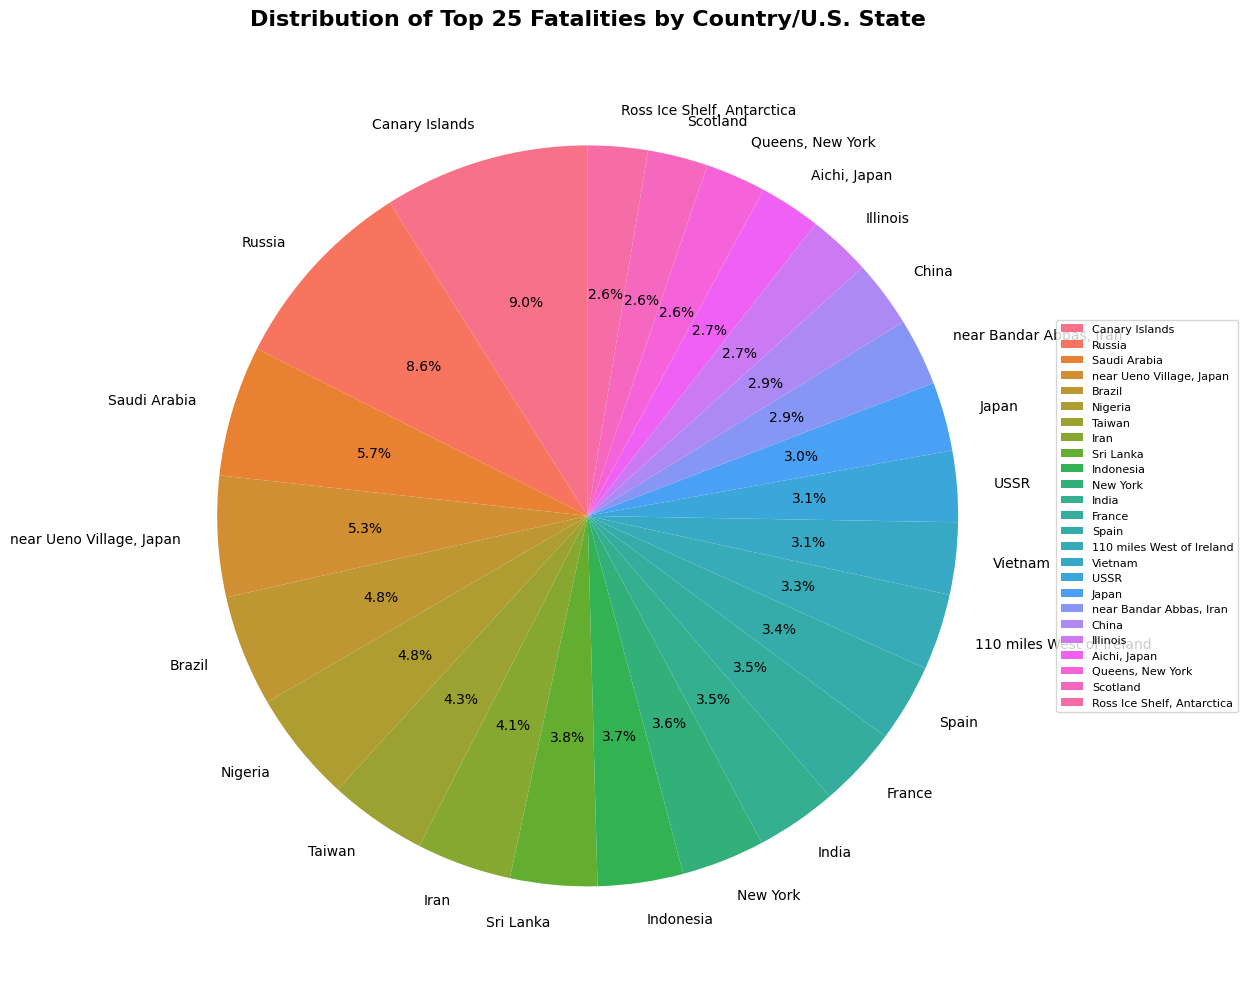


Top 25 countries/states by total fatalities:
StateCountry
Canary Islands                884.0
Russia                        846.0
Saudi Arabia                  562.0
near Ueno Village, Japan      520.0
Brazil                        478.0
Nigeria                       477.0
Taiwan                        421.0
Iran                          408.0
Sri Lanka                     374.0
Indonesia                     368.0
New York                      358.0
India                         349.0
France                        346.0
Spain                         335.0
110 miles West of Ireland     329.0
Vietnam                       310.0
USSR                          306.0
Japan                         296.0
near Bandar Abbas, Iran       290.0
China                         288.0
Illinois                      271.0
Aichi, Japan                  264.0
Queens, New York              260.0
Scotland                      259.0
Ross Ice Shelf, Antarctica    257.0
Name: Fatalities, dtype: float64


In [12]:
print(f"=== STEP 10: Top 25 Fatalities by Country/State Pie Chart ===")
country_fatalities = top_100_crashes.groupby('StateCountry')['Fatalities'].sum().sort_values(ascending=False).head(25)

plt.figure(figsize=(16, 10))
colors = sns.color_palette("husl", len(country_fatalities))
plt.pie(country_fatalities, labels=country_fatalities.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Top 25 Fatalities by Country/U.S. State', fontsize=16, fontweight='bold', pad=20)
plt.legend(country_fatalities.index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=8)
plt.tight_layout()
plt.show()

print(f"\nTop 25 countries/states by total fatalities:")
print(country_fatalities)